# **Loading Libraries and Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from tensorflow.keras.layers import Dropout


In [2]:
df=pd.read_csv("powerconsumption.csv")
df.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


# **Data_Preprocessing**

In [4]:
df=df.drop(columns=['PowerConsumption_Zone1','PowerConsumption_Zone2'],axis=1)
df.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,18442.40964


**1.Removing Duplicates**

In [5]:
df.drop_duplicates()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,18442.40964
...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,13512.60504


**2.Detecting and Treating Outliers Using IQR Method**

In [6]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,47598.326360


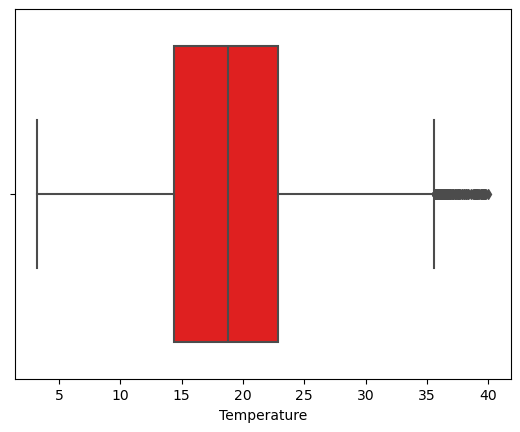

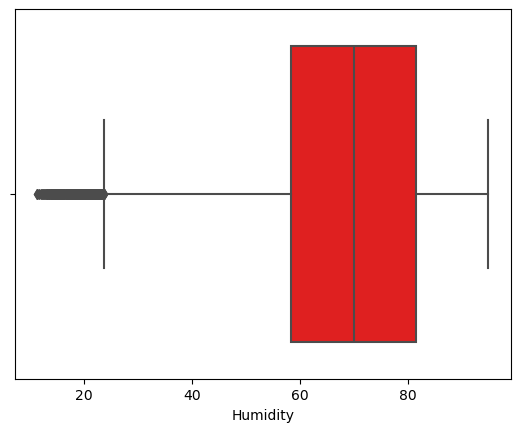

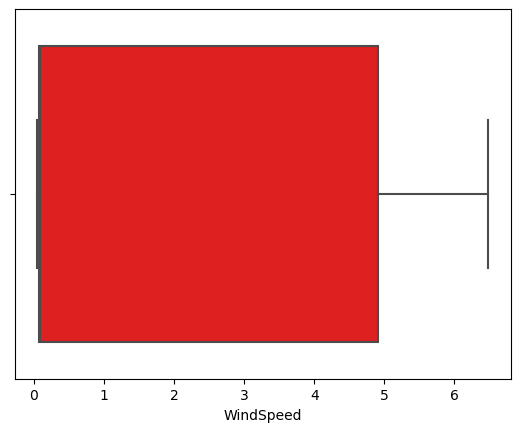

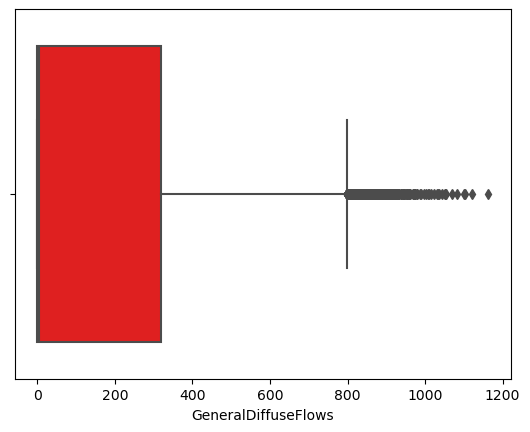

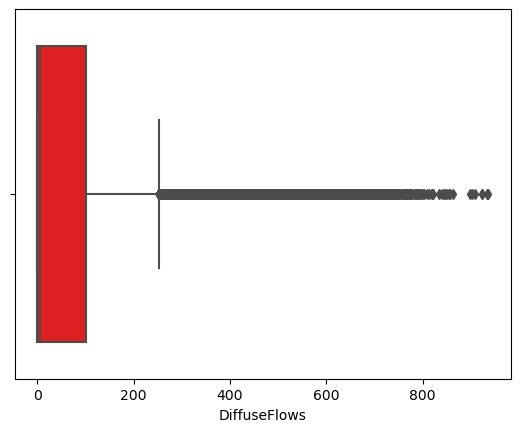

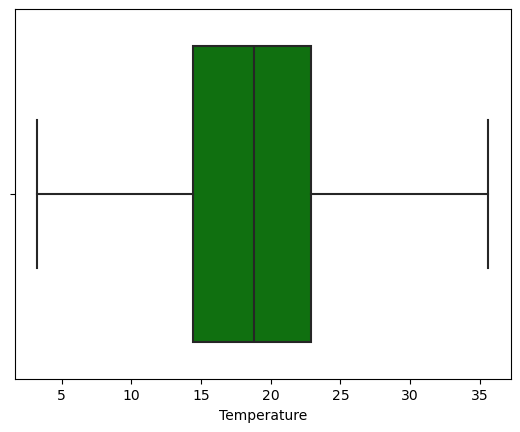

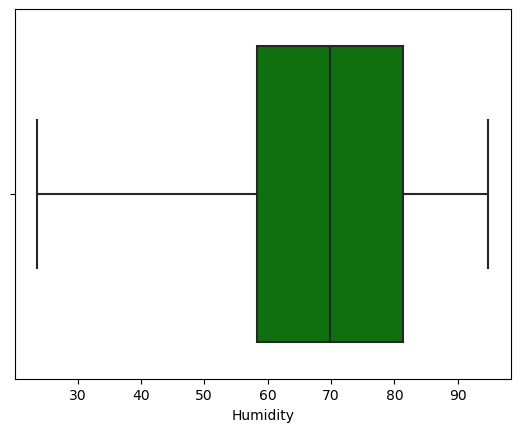

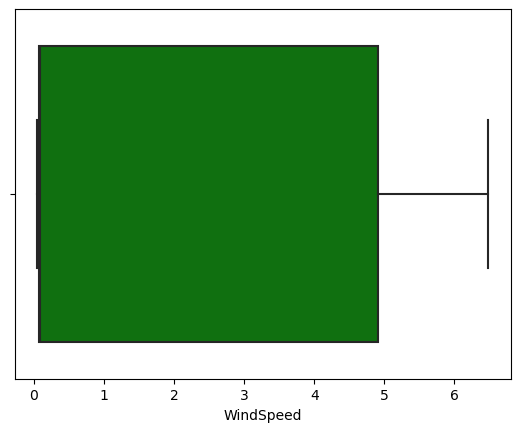

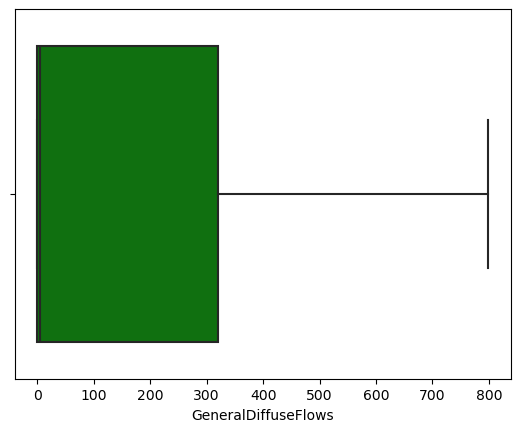

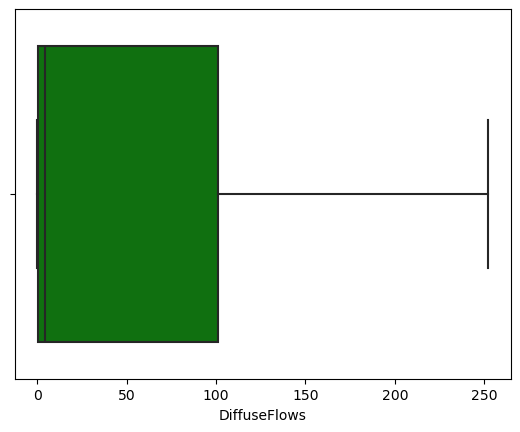

In [7]:
float_columns = df.select_dtypes(include='float64').columns.tolist()
float_columns.remove("PowerConsumption_Zone3")

for i in float_columns:
    sns.boxplot(x=df[i],color='red')
    plt.show()

for i in float_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    df[i] = pd.DataFrame(np.where(df[i] > ub, ub, np.where(df[i] < lb, lb, df[i])))


for i in float_columns:
    sns.boxplot(x=df[i],color='green')
    plt.show()

C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


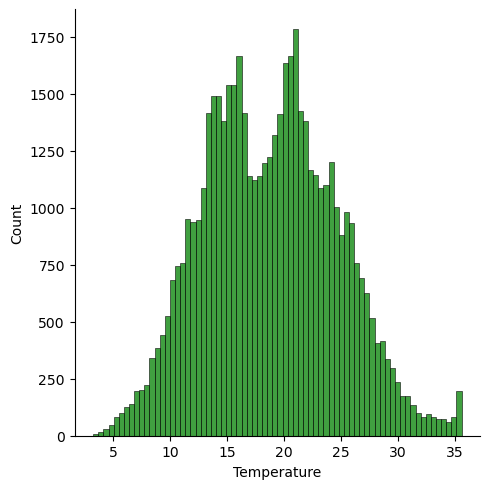

C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


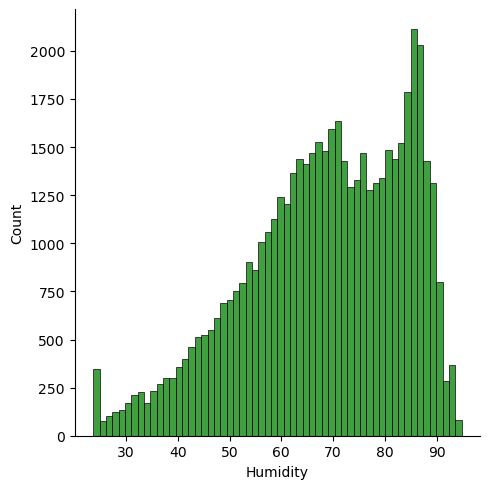

C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


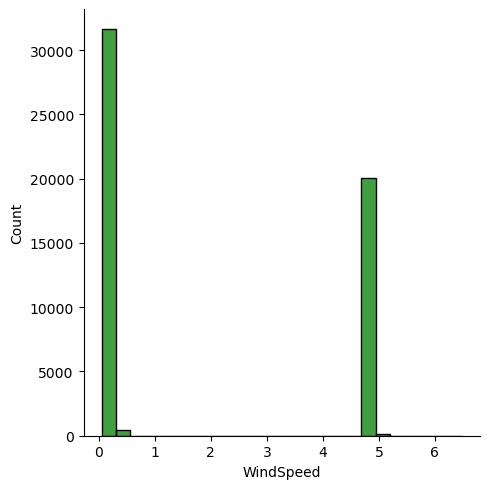

C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


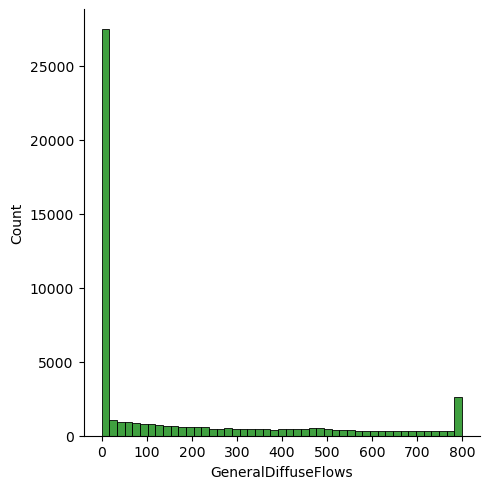

C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


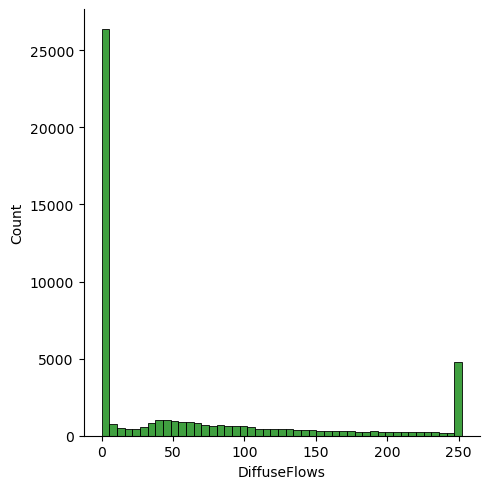

In [8]:
for i in float_columns:
    sns.displot(x=df[i],color='g')
    plt.show()

**3.Arranging Date in Ascending Order**

In [9]:
df['Datetime']=pd.to_datetime(df.Datetime)
df.sort_values(by='Datetime', ascending=True, inplace=True)

chronological_order = df['Datetime'].is_monotonic_increasing

time_diffs = df['Datetime'].diff()
equidistant_timestamps = time_diffs.nunique() == 1

In [10]:
chronological_order, equidistant_timestamps


(True, True)

# **Feature_Extraction**

In [11]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['day'] = df.index.month
    df['year'] = df.index.year
    df['season'] = df['month'] % 12 // 3 + 1
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

    # Additional features
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['is_month_start'] = (df['dayofmonth'] == 1).astype(int)
    df['is_month_end'] = (df['dayofmonth'] == df.index.days_in_month).astype(int)
    df['is_quarter_start'] = (df['dayofmonth'] == 1) & (df['month'] % 3 == 1).astype(int)
    df['is_quarter_end'] = (df['dayofmonth'] == df.groupby(['year', 'quarter'])['dayofmonth'].transform('max'))

    # Additional features
    df['is_working_day'] = df['dayofweek'].isin([0, 1, 2, 3, 4]).astype(int)
    df['is_business_hours'] = df['hour'].between(9, 17).astype(int)
    df['is_peak_hour'] = df['hour'].isin([8, 12, 18]).astype(int)

    # Minute-level features
    df['minute_of_day'] = df['hour'] * 60 + df['minute']
    df['minute_of_week'] = (df['dayofweek'] * 24 * 60) + df['minute_of_day']

    return df.astype(float)

In [12]:
df = df.set_index('Datetime')
df = create_features(df)

In [13]:
df[[ 'year', 'month', 'day','minute', 'dayofyear', 'weekofyear', 'quarter', 'season']].head()

,year,month,day,minute,dayofyear,weekofyear,quarter,season
Datetime,,,,,,,,
2017-01-01 00:00:00,2017.0,1.0,1.0,0.0,1.0,52.0,1.0,1.0
2017-01-01 00:10:00,2017.0,1.0,1.0,10.0,1.0,52.0,1.0,1.0
2017-01-01 00:20:00,2017.0,1.0,1.0,20.0,1.0,52.0,1.0,1.0
2017-01-01 00:30:00,2017.0,1.0,1.0,30.0,1.0,52.0,1.0,1.0
2017-01-01 00:40:00,2017.0,1.0,1.0,40.0,1.0,52.0,1.0,1.0


# **EDA**


**1.Correlation Between Dependent Variables Using Heatmap**

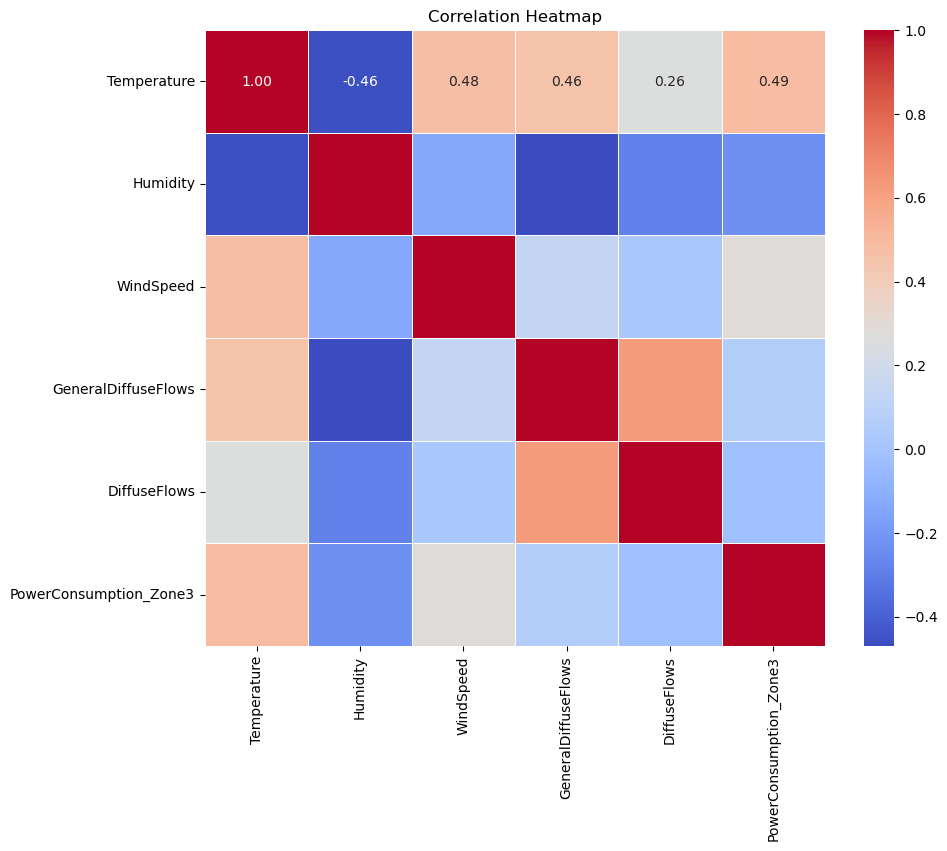

In [14]:
correlation_matrix = df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows','DiffuseFlows','PowerConsumption_Zone3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**2.Power Consumption in Zone 3 Over the Time Period**

C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


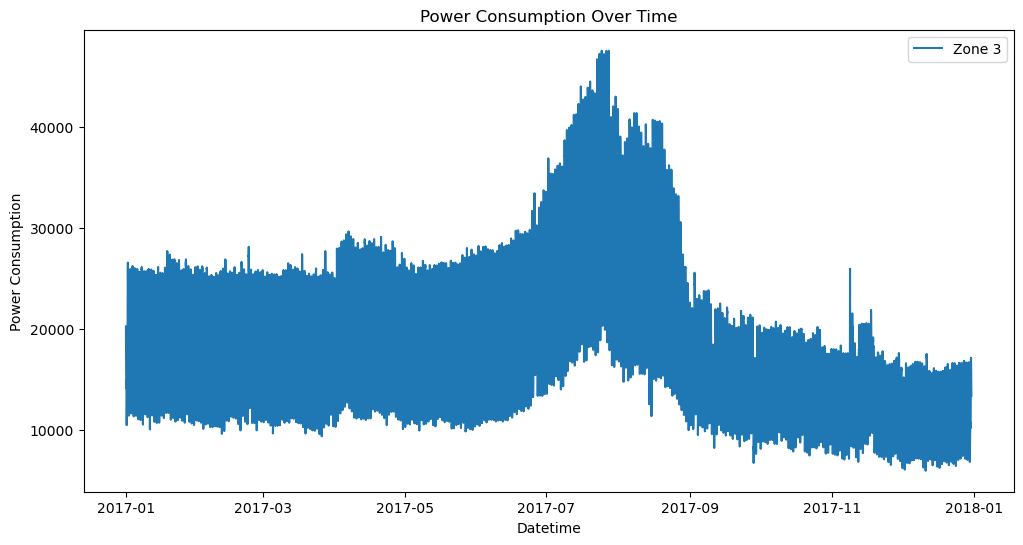

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Datetime', y='PowerConsumption_Zone3', data=df, label='Zone 3')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()

**3.Average Daily Power Consume Over the Time Period**

C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


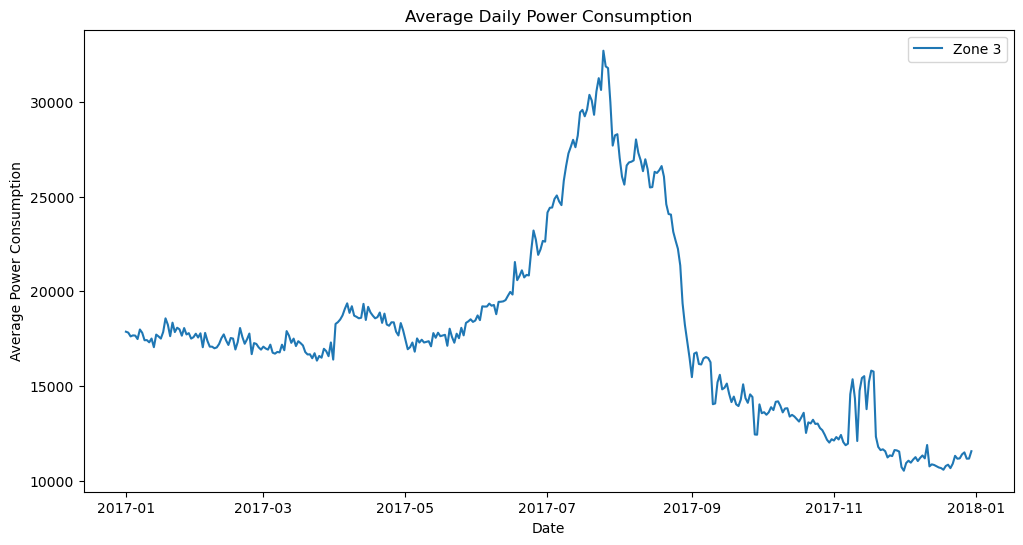

In [16]:
daily_resampled = df.resample('D').mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_resampled[ 'PowerConsumption_Zone3'])
plt.xlabel('Date')
plt.ylabel('Average Power Consumption')
plt.title('Average Daily Power Consumption')
plt.legend(labels=['Zone 3'])
plt.show()

**4.Avg Monthly Temperature wrt Avg Monthly Power Consumption**

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_4676\1712535544.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


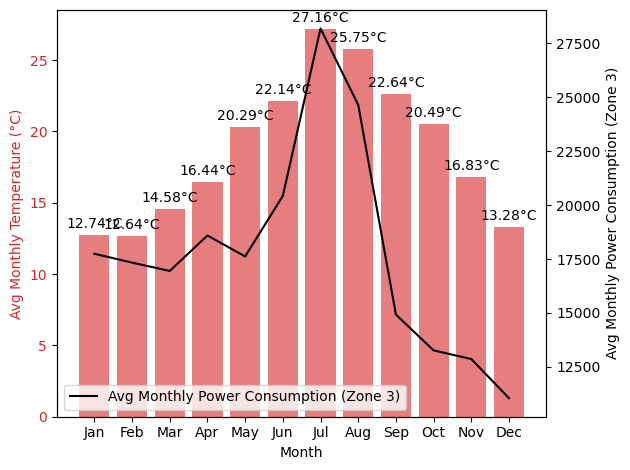

In [17]:
monthly_data = df.resample('M').mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Monthly Temperature (°C)', color=color)
ax1.bar(monthly_data.index.month, monthly_data['Temperature'], color=color, alpha=0.6, label='Avg Monthly Temperature')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'black'
ax2.set_ylabel('Avg Monthly Power Consumption (Zone 3)', color=color)
ax2.plot(monthly_data.index.month, monthly_data['PowerConsumption_Zone3'], color=color, label='Avg Monthly Power Consumption (Zone 3)')
ax2.tick_params(axis='y', labelcolor=color)

for i, temp in enumerate(monthly_data['Temperature']):
    ax1.text(i + 1, temp + 0.5, f'{temp:.2f}°C', ha='center', color=color)

ax1.set_xticks(monthly_data.index.month)
ax1.set_xticklabels(monthly_data.index.strftime('%b'))

fig.tight_layout()
plt.legend(loc='lower left')
plt.show()


*Insighths*:
- There is a strong positive correlation between average monthly temperature and average monthly power consumption in Zone 3.- The highest average monthly power consumption occurs in July, corresponding to the highest average monthly temperature.3.
- The lowest average monthly power consumption occurs in December, corresponding to the lowest average monthly temperature4.
- There is a trend of increasing power consumption from January to July, followed by a decline from July to Decembr..
- This trend suggests that people in Zone 3 tend to use more energy during the warmer months, possibly for air conditioning or other cooling purpes.
- The data also shows a significant drop in power consumption from August to September, which could be attributed to factors like seasonal changes in weather patterns, reduced daylight hours, or changes in consumer beeaor.
- Overall, the data provides valuable insights into the relationship between temperature and power consumption, highlighting the potential impact of climate change on energy demand.


**5.Avg Monthly Humidity vs Avg Power Consumption of Zone 3 with Temperature**

C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\envs\ai2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


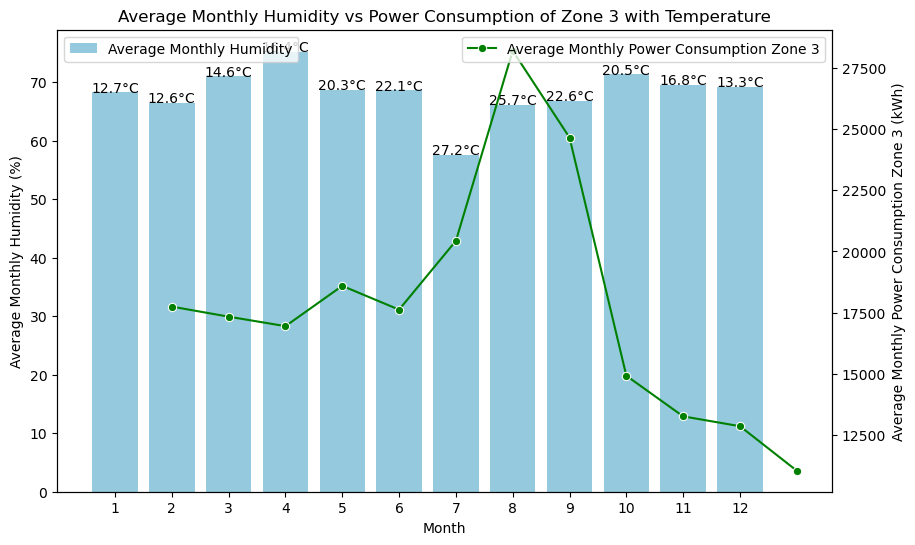

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=monthly_data.index.month, y='Humidity', data=monthly_data, ax=ax1, color='skyblue', label='Average Monthly Humidity')

ax2 = ax1.twinx()

sns.lineplot(x=monthly_data.index.month, y='PowerConsumption_Zone3', data=monthly_data, ax=ax2, color='green', marker='o', label='Average Monthly Power Consumption Zone 3')

for i, row in monthly_data.iterrows():
    ax1.text(row.name.month-1, row['Humidity'], f"{row['Temperature']:.1f}°C", color='black', ha="center")

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Monthly Humidity (%)')
ax2.set_ylabel('Average Monthly Power Consumption Zone 3 (kWh)')
plt.title('Average Monthly Humidity vs Power Consumption of Zone 3 with Temperature')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


*Insights*
- The graph shows an inverse relationship between average monthly humidity and average monthly power consumption in Zone 3.
- As humidity increases, power consumption decreases.
- This trend is particularly evident between Month 7 and Month 10, where humidity increases significantly, and power consumption drops.  
- The highest average monthly humidity was observed in Month 4 with 74% and the lowest was observed in Month 12 with 13.3%.
- The highest average monthly power consumption was observed in Month 8 with 27,000 kWh and the lowest was observed in Month 12 with 11,000 kWh.
- The months with the highest humidity levels (May-September) generally coincide with the months with the lowest power consumption.




**5.Total Power Consumption by Month and Season**

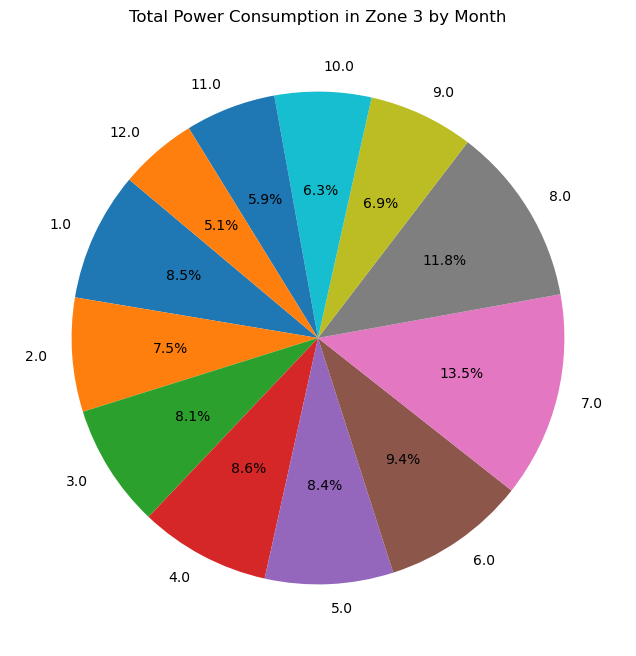

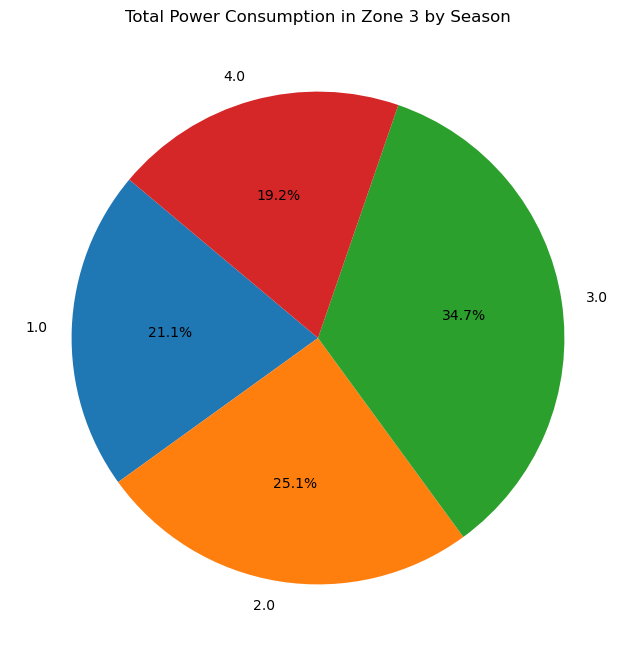

In [19]:

monthly_consumption = df.groupby('month')['PowerConsumption_Zone3'].sum()
seasonal_consumption = df.groupby('season')['PowerConsumption_Zone3'].sum()

plt.figure(figsize=(8, 8))
plt.pie(monthly_consumption, labels=monthly_consumption.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Power Consumption in Zone 3 by Month')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(seasonal_consumption, labels=seasonal_consumption.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Power Consumption in Zone 3 by Season')
plt.show()


**6.Avg. Power Consumption vs Windspeed**

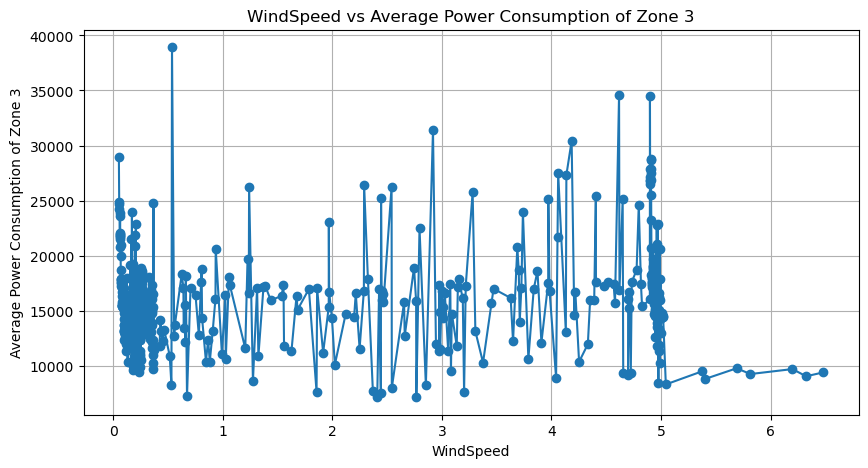

In [20]:
avg_power_consumption = df.groupby('WindSpeed')['PowerConsumption_Zone3'].mean().reset_index()


plt.figure(figsize=(10, 5))
plt.plot(avg_power_consumption['WindSpeed'], avg_power_consumption['PowerConsumption_Zone3'], marker='o')
plt.title('WindSpeed vs Average Power Consumption of Zone 3')
plt.xlabel('WindSpeed')
plt.ylabel('Average Power Consumption of Zone 3')
plt.grid(True)
plt.show()

**Insights**
- The graph displays the relationship between wind speed and average power consumption of zone 3.
- The average power consumption generally decreases as wind speed increases. 
- However, there are some outliers, where the power consumption is high even with high wind speed.
- It suggests that there might be other factors affecting power consumption besides wind speed. 
- Further investigation is required to understand the relationship between wind speed and power consumption. 



**7.Genral Diffuse Flows vs Avg. Power Consumption**

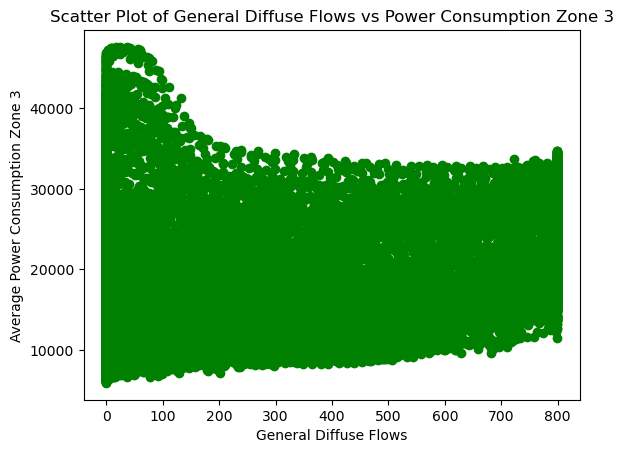

In [21]:
general_diffuse_flows = df['GeneralDiffuseFlows']
power_consumption_zone3 = df['PowerConsumption_Zone3']

plt.scatter(general_diffuse_flows, power_consumption_zone3, color='green')
plt.title('Scatter Plot of General Diffuse Flows vs Power Consumption Zone 3')
plt.xlabel('General Diffuse Flows')
plt.ylabel('Average Power Consumption Zone 3')
plt.show()

**Insights**
- The scatter plot shows the relationship between General Diffuse Flows and Average Power Consumption Zone 3.
- As General Diffuse Flows increase, Average Power Consumption Zone 3 tends to decrease.
- The relationship between the two variables appears to be non-linear, with a decreasing trend.
- There is a large amount of data points clustered together in the lower right corner of the plot, suggesting that a large portion of the data has high General Diffuse Flows and low Average Power Consumption Zone 3.
- This plot could be used to understand the relationship between General Diffuse Flows and Average Power Consumption Zone 3 and to identify potential areas for optimization.


**8.Diffuse Flows vs Avg. Power Consumption**

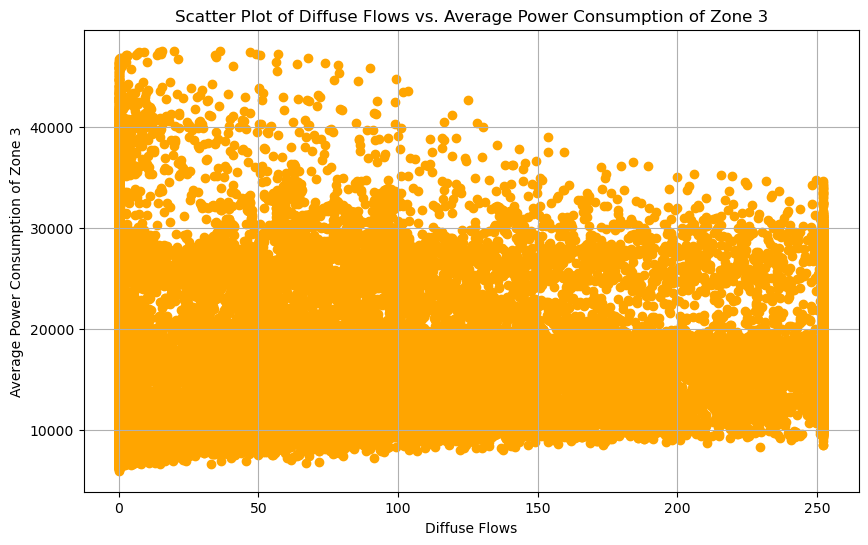

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DiffuseFlows'], df['PowerConsumption_Zone3'], color='orange')
plt.title('Scatter Plot of Diffuse Flows vs. Average Power Consumption of Zone 3')
plt.xlabel('Diffuse Flows')
plt.ylabel('Average Power Consumption of Zone 3')
plt.grid(True)
plt.show()

**Insights**
- The scatter plot shows the relationship between diffuse flows and average power consumption of zone 3.
- The plot suggests that there is a weak positive correlation between the two variables. 
- However, the relationship is not very strong, meaning that changes in diffuse flows do not necessarily lead to significant changes in average power consumption. 
- The data points are clustered in a relatively narrow band, indicating that the power consumption for zone 3 generally remains within a certain range, regardless of the diffuse flow values. 
- The plot could be further analyzed by looking at the distribution of data points within the band to identify any potential patterns or anomalies. 



In [20]:
df1=df.copy()

# **Train_Test_Split**

In [21]:
from sklearn.preprocessing import StandardScaler

X = df1.drop(['PowerConsumption_Zone3'], axis=1)
y = df1['PowerConsumption_Zone3']

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [22]:
print(X.shape,y.shape)

(52416, 26) (52416,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(39312, 26) (39312,)
(13104, 26) (13104,)


# **Models**

**1.Ada_Boost_Regressor**

In [25]:
ad=AdaBoostRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
para_grid={'n_estimators':[100,200,300,400],
          'learning_rate':[1,0.1,0.001]
          }

gcv=GridSearchCV(estimator=ad,param_grid=para_grid,cv=5,n_jobs=-1)
gcv.fit(X_train,y_train)

best_param=gcv.best_params_
print(best_param)

best_model=gcv.best_estimator_
best_model.fit(X_train,y_train)

{'learning_rate': 0.1, 'n_estimators': 400}


AdaBoostRegressor(learning_rate=0.1, n_estimators=400)

In [26]:
ada_train_score=r2_score(best_model.predict(X_train),y_train)
ada_test_score=r2_score(best_model.predict(X_test),y_test)
print("train score:",ada_train_score*100)
print("test score:",ada_test_score*100)

train score: 77.70608831853929
test score: 78.22885220454525


**2.ANN**

In [27]:
from tensorflow.keras import regularizers
adam = optimizers.Adam(0.01)

model_mlp = Sequential()
model_mlp.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1],kernel_regularizer=regularizers.l2(0.2)))
model_mlp.add(Dense(units=32,activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(1,activation='linear'))
model_mlp.compile(loss='mse', optimizer=adam,metrics=['mae'])
model_mlp.summary()
mlp_history = model_mlp.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1229/1229 - 1s - loss: 44544448.0000 - mae: 4578.8096 - val_loss: 12798872.0000 - val_mae: 2730.5869 - 1s/epoch - 1ms/step
Epoch 2/50
1229/1229 - 1s - loss: 16811740.0000 - ma

In [28]:
ann_train_score = r2_score(y_train,model_mlp.predict(X_train))
ann_test_score = r2_score(y_test, model_mlp.predict(X_test))

410/410 [==============================] - 0s 438us/step


In [29]:
print("train score:",ann_train_score*100)
print("test score:",ann_test_score*100)

train score: 96.24915950795784
test score: 96.13544546350184


**3.Random_Forest_Regressor**

In [30]:
rr=RandomForestRegressor()
para_grid = {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [3,4,5],
        'min_samples_split':[4,5,6],
        'min_samples_leaf':[11,12,13]
        }
gcv = GridSearchCV(estimator=rr, param_grid=para_grid, cv=5, n_jobs=-1)
gcv.fit(X_train, y_train)
best_param = gcv.best_params_
print( best_param)
    
best_model = gcv.best_estimator_
best_model.fit(X_train, y_train)

{'max_depth': 5, 'min_samples_leaf': 11, 'min_samples_split': 6, 'n_estimators': 400}


RandomForestRegressor(max_depth=5, min_samples_leaf=11, min_samples_split=6,
                      n_estimators=400)

In [31]:
rr_train_score = r2_score(y_train, best_model.predict(X_train))
rr_test_score = r2_score(y_test, best_model.predict(X_test))
print("train score:",rr_train_score*100)
print("test score:",rr_test_score*100)

train score: 90.317122647548
test score: 90.26376657024235


# **Model_Accuracy_Comparison**

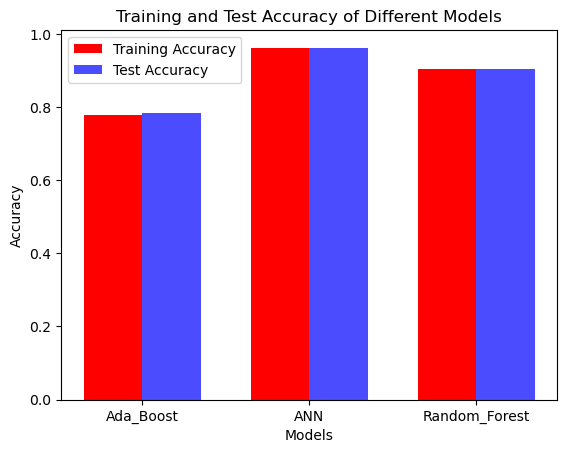

In [32]:
model_names = ["Ada_Boost",  "ANN", "Random_Forest"]
train_accuracy = [ada_train_score,  ann_train_score, rr_train_score]
test_accuracy = [ada_test_score,  ann_test_score, rr_test_score]

x = np.arange(len(model_names)) 
width = 0.35

plt.bar(x - width/2, train_accuracy, width, color='r', label='Training Accuracy')
plt.bar(x + width/2, test_accuracy, width, color='b', label='Test Accuracy', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy of Different Models')
plt.xticks(x, model_names)
plt.legend()

plt.show()


# **Conclusion**

By analyzing the bar graph comparing the accuracy of different models, it is clear that **ANN** stands out as the most suitable option with high accuracy for this project.